## Step 1: Importing Libraries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Step 2: Reading and Understanding the Data

In [5]:
# Read the data from csv file
bike = pd.read_csv('day.csv')

In [6]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Checking the shape of data
print(bike.shape)

(730, 16)


In [8]:
# Checking the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Checking the statistical desciption of numerical columns of dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# checking for the null values in data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 3: Cleaning Data

#### By looking at the data we can conclude that the following columns are of no use and can be conveniently dropped:-
1) instant: It is just a row instance identifier. 
2) dteday: This feature gives the date of record. This information is redundant as there are two other features mnth (Month) and yr (Year),
3) casual & registered: These two values give count of casual and registered users respectively. However, there is a column cnt containing sum of these two columns.

In [13]:
# Drop the specified columns from the DataFrame and update it in place
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Handling outliers

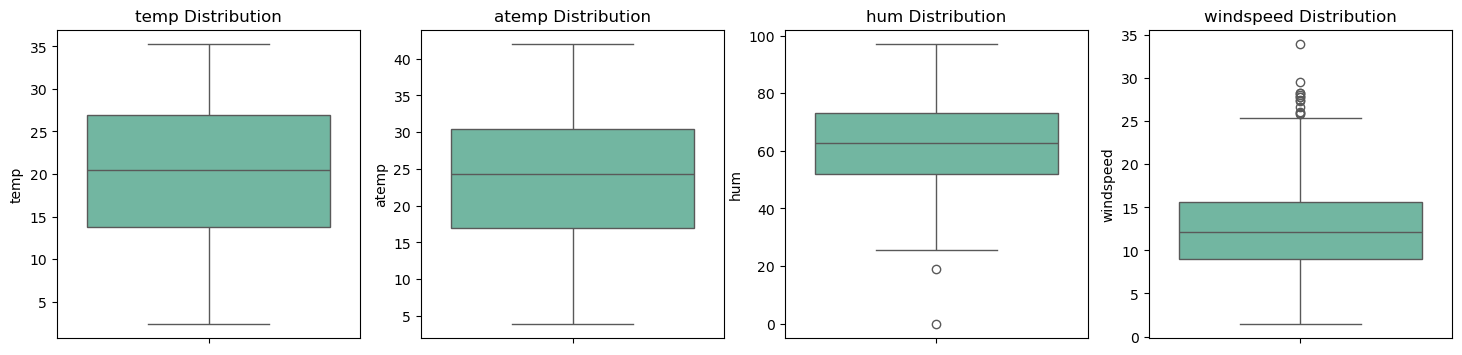

In [16]:
# Define the columns
cols = ['temp', 'atemp', 'hum', 'windspeed']

# Set the figure size
plt.figure(figsize=(18, 4))

# Define a color palette
palette = 'Set2'

# Loop through the columns and create box plots with color
i = 1
for col in cols:
    plt.subplot(1, 4, i)
    sns.boxplot(y=col, data=bike, palette=palette)
    plt.title(f'{col} Distribution')
    i += 1

##### From the above plots it is clear that we don't have any outliers.

## EDA

In [19]:
# Mapping the season column
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [20]:
# Count the occurrences of each unique value in the 'season' column
bike['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [21]:
# Mapping the month column
bike['mnth'] = bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [22]:
# Count the occurrences of each unique value in the 'mnth' column
bike['mnth'].value_counts()

mnth
jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: count, dtype: int64

In [23]:
# Mapping the weekday column
bike['weekday'] = bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [24]:
# Count the occurrences of each unique value in the 'weekday' column
bike['weekday'].value_counts()

weekday
mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: count, dtype: int64

In [25]:
# Mapping the weathersit column
bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Misty',3:'Light',4:'Heavy'})

In [26]:
# Count the occurrences of each unique value in the 'weathersit' column
bike['weathersit'].value_counts()

weathersit
Clear    463
Misty    246
Light     21
Name: count, dtype: int64

#### Visualising the numerical variables

<Figure size 1500x1000 with 0 Axes>

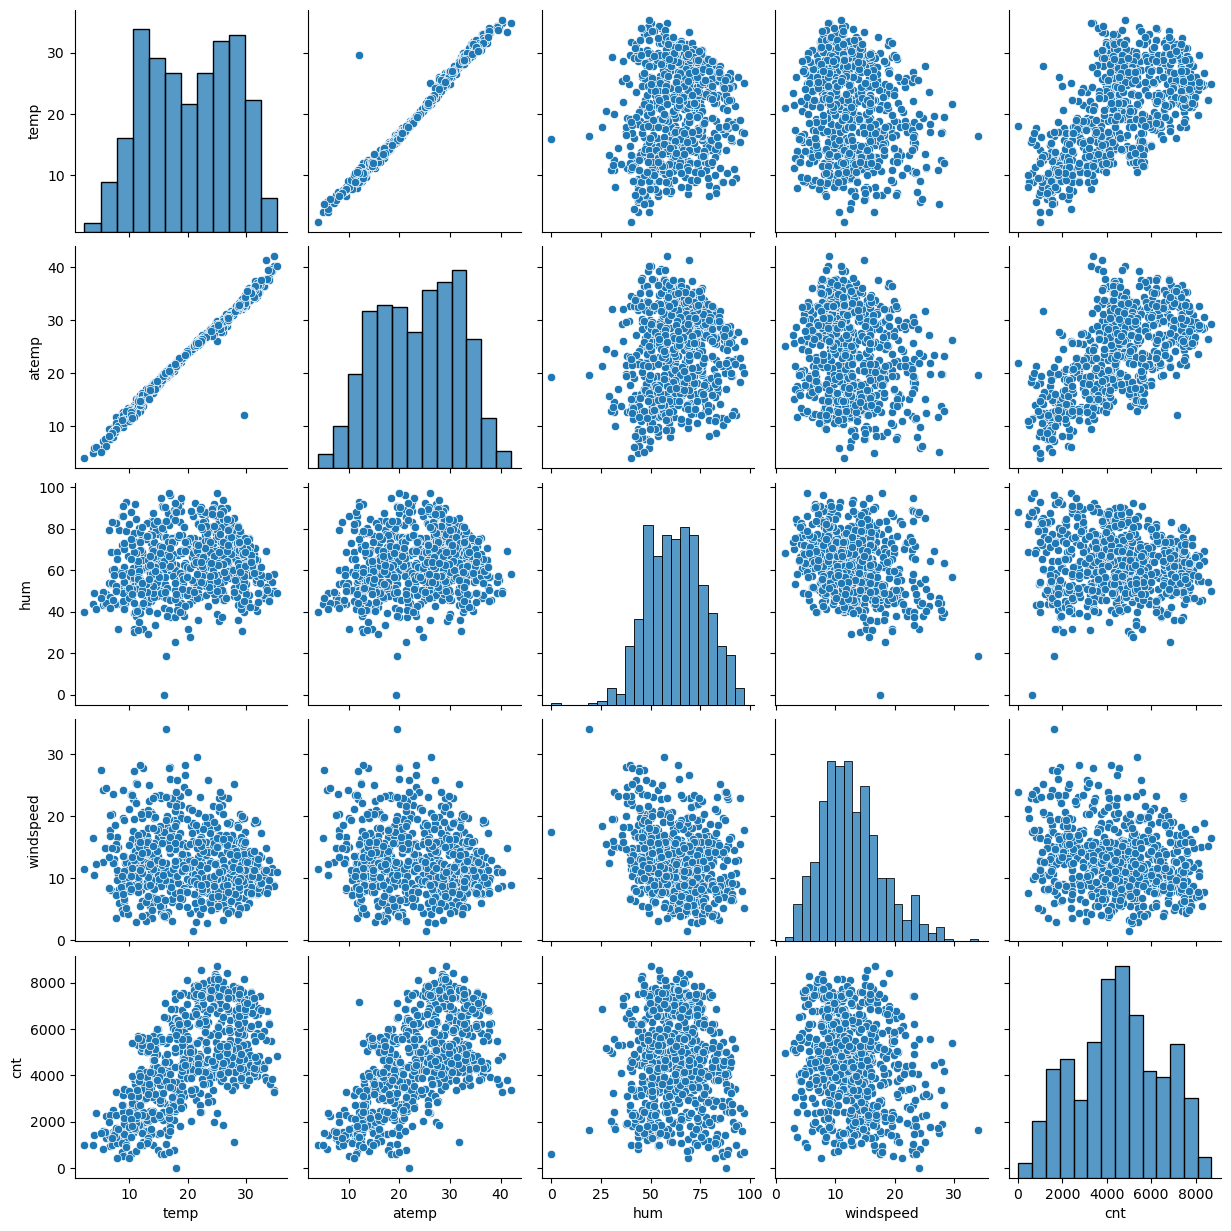

In [28]:
# Create a list of numerical variables only
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Visualise correlations among these numerical variables by plotting multiple scatter plots
plt.figure(figsize=(15,10))
sns.pairplot(bike[num_vars])
plt.savefig('fig1.png')
plt.show()

#### Inference:
##### 1)From above scatter plots, we observe that 'cnt' has positive correlation with 'temp' and 'atemp'.
##### 2)There is strong collinearity among the variables 'temp' and 'atemp'.

#### Visualising the categorical variables

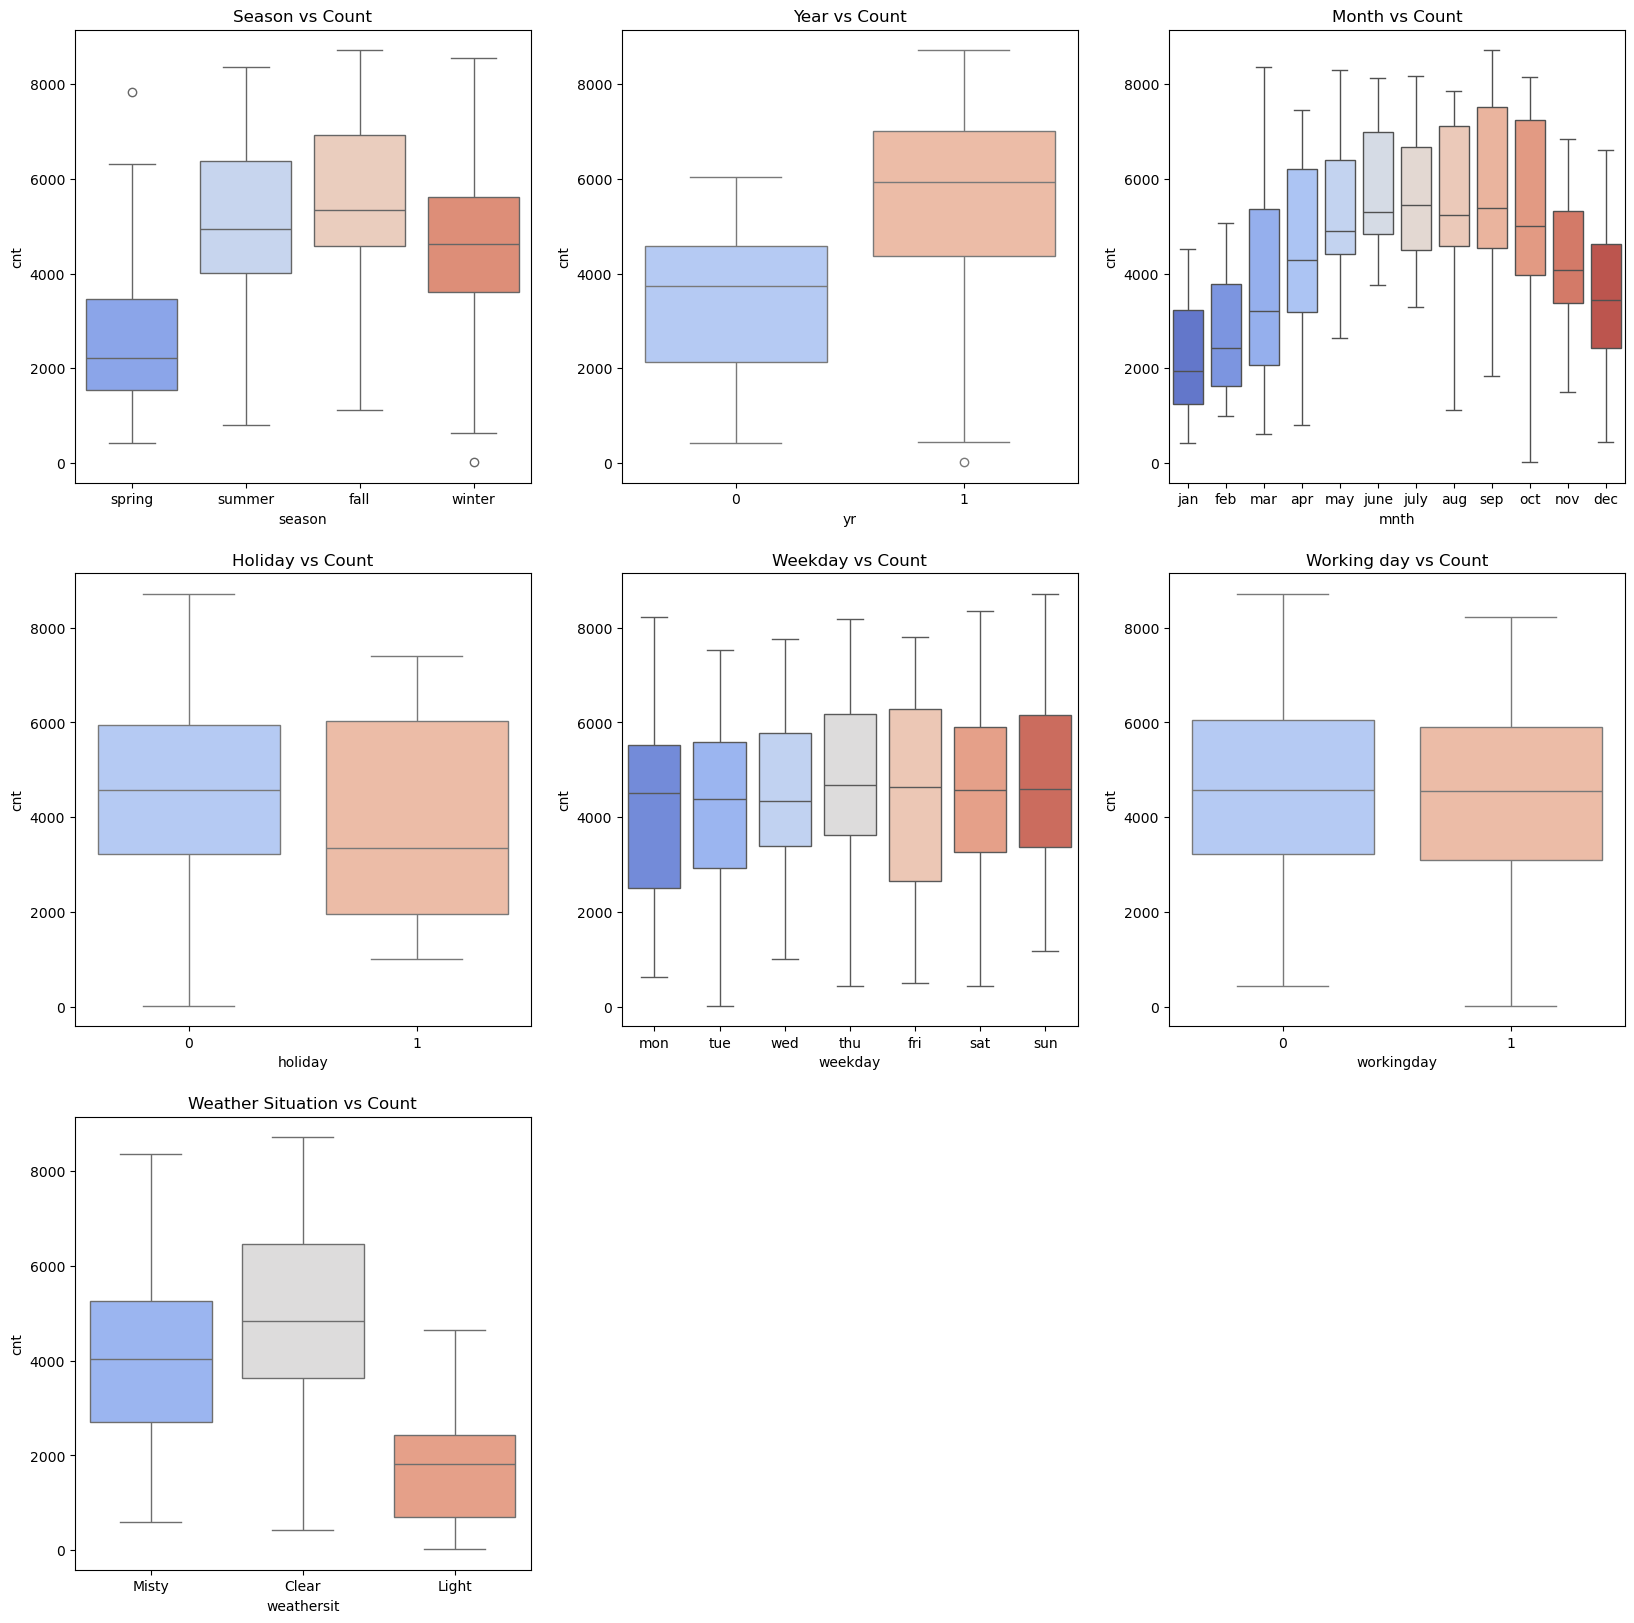

In [31]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike, palette='coolwarm')
plt.title('Season vs Count')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike, palette='coolwarm')
plt.title('Year vs Count')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike, palette='coolwarm')
plt.title('Month vs Count')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike, palette='coolwarm')
plt.title('Holiday vs Count')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike, palette='coolwarm')
plt.title('Weekday vs Count')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike, palette='coolwarm')
plt.title('Working day vs Count') 

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike, palette='coolwarm')
plt.title('Weather Situation vs Count')
plt.savefig('fig2.png')
plt.show()

#### Inference:
Here many insights can be drawn from the plots
1) More bikes are rented in fall and summer seasons, and from May to October months
2) More number of bikes were rented in 2019 than in 2018.
3) If the weather is clear (or having few clouds), then more bikes are rented. No bikes are rented in heavy weather.
4) Rest of the features holiday, workingday and weekday are not showing much difference in pattern.
Overall, the data is well behaved with very few outliers.

#### Visualising Correlation among variables

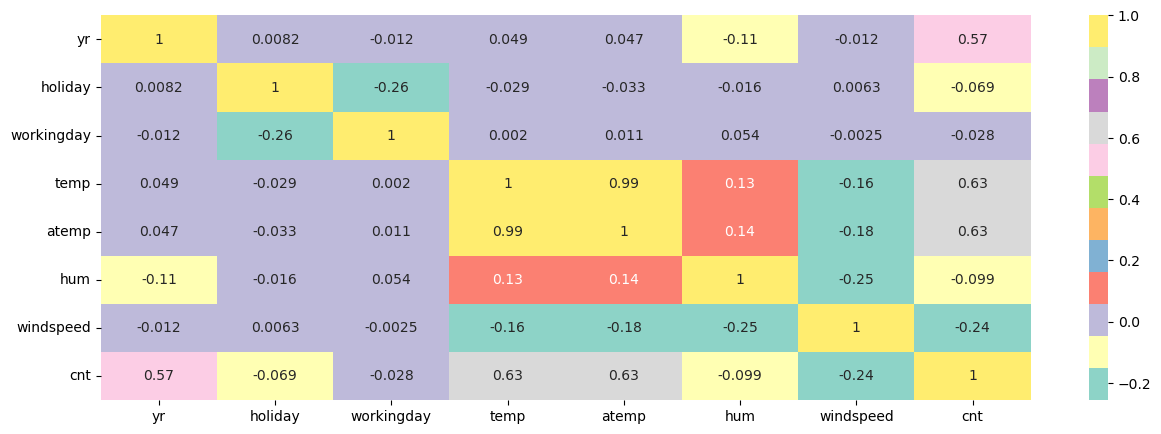

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(bike[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(),cmap="Set3",annot=True)
plt.show()

##### Here we can see that temp and atemp has correlation value as .99 which means they are highly correlated .

#### Creating Dummy Variables

In [37]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Inferences:
Categorical variables having two levels: 'yr', 'holiday'and 'workingday' are already having values as 0s and 1s. So, we don't need to map them.

However, we need to convert categorical variables having more than two levels to dummy variables, which are 'season', 'mnth', 'weekday', 'weathersit'

In [39]:
varlist = ['season', 'mnth', 'weekday', 'weathersit']

In [40]:
# Dummy variable creation for month, weekday, weathersit and season variables.
dummy1 = pd.get_dummies(bike[varlist], drop_first=True, dtype=int)
bike = pd.concat([bike, dummy1], axis=1)
bike = bike.drop(varlist, axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
print(bike.shape)

(730, 30)


In [42]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light', 'weathersit_Misty'],
      dtype='object')

## Step4: Splitting the Data into Training and Testing Sets

In [44]:
#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
# See the dimensions of our train set and test set
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [46]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [47]:
# Using MinMaxScaler  Rescaling the features
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [48]:
# verifying the head after appying scaling.
df_train[num_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
90%,0.830848,0.781425,0.840232,0.546410,0.834319
95%,0.878043,0.820751,0.892743,0.651218,0.867361
99%,0.949327,0.884022,0.952580,0.788419,0.931351


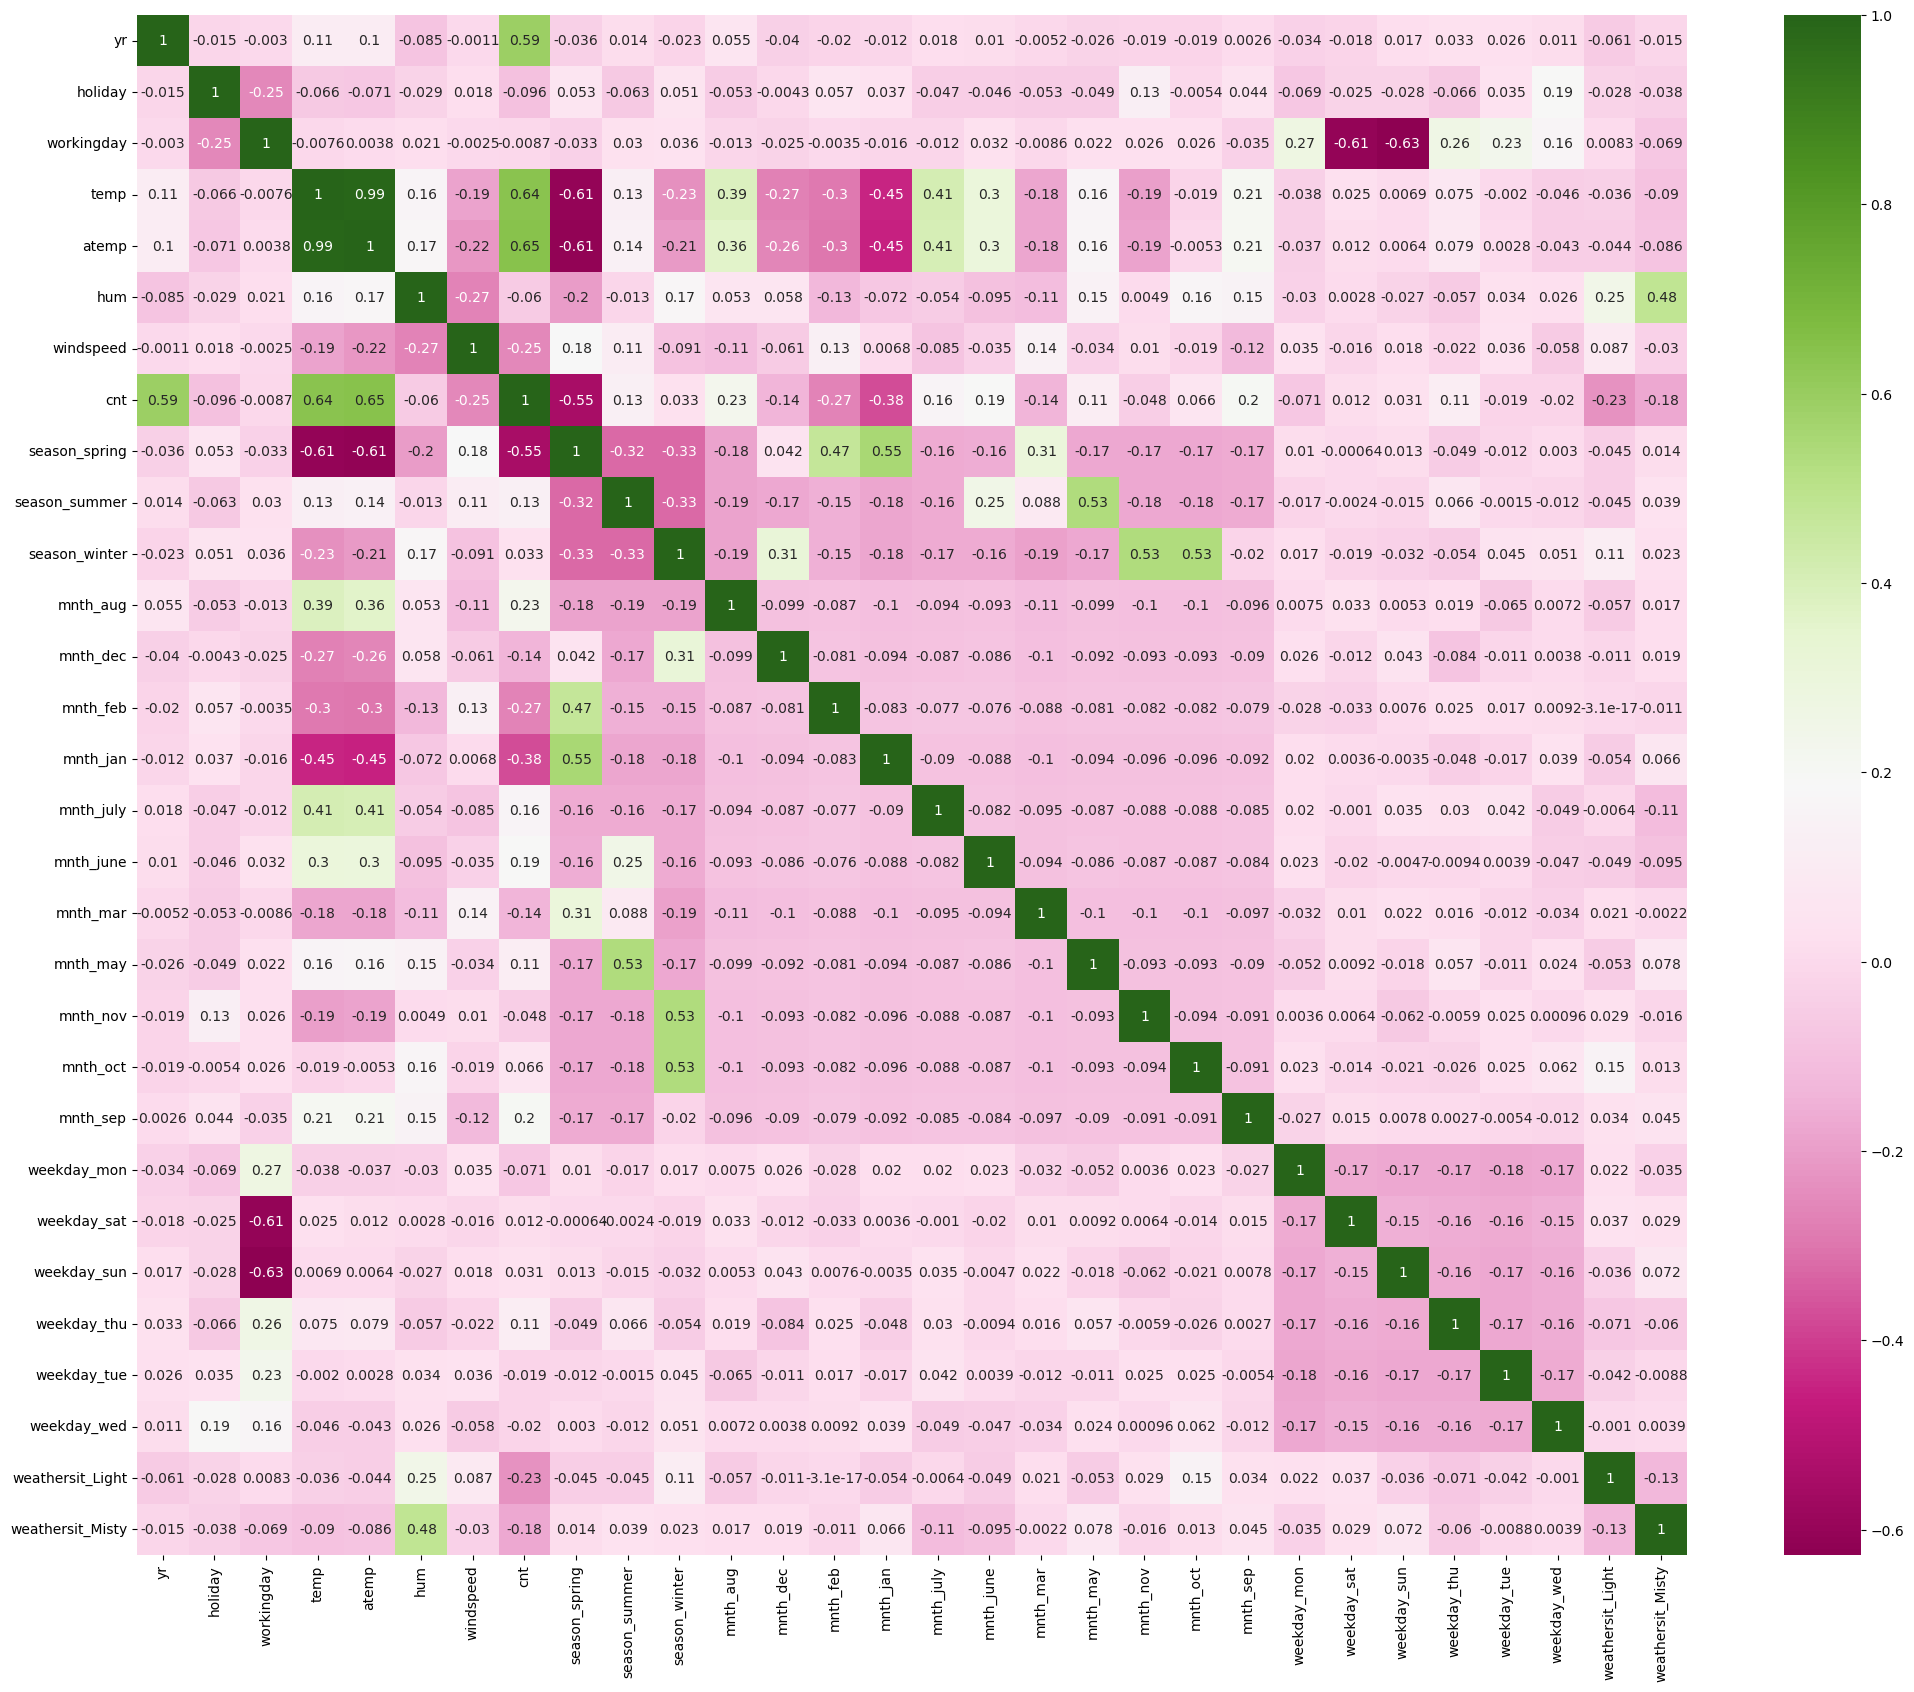

In [49]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='PiYG');

1) 'cnt' seems to have correlation with 'yr', 'atemp' variable and 'temp'. 
2) Similarly, 'Misty' and 'humidity' show correlation. 
3) 'Spring' season shows correlation with 'Jan' and 'Feb' month.
4) 'Summer' season with 'may' month.
5) 'Winter' season with 'oct' and 'nov' month show good correlation.

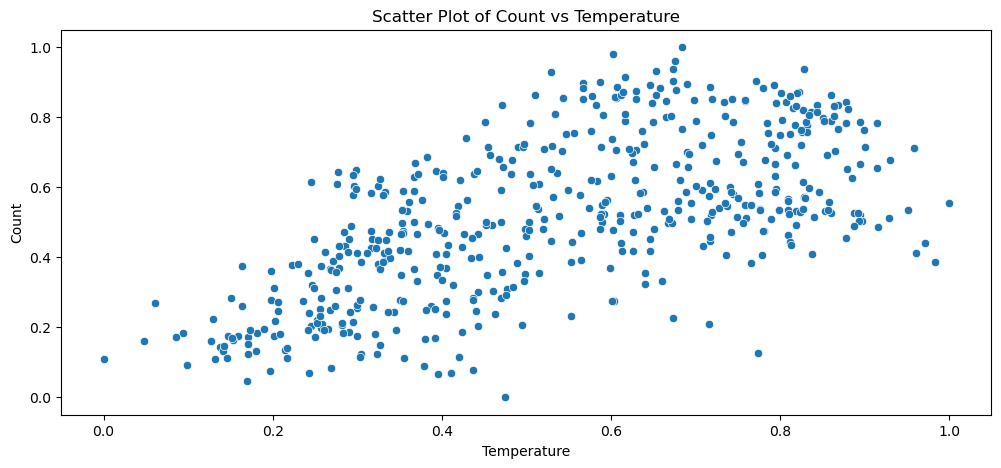

In [51]:
# Scatter plots of 'cnt' v/s 'temp'
plt.figure(figsize=(12, 5))
sns.scatterplot(x='temp', y='cnt', data=df_train)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot of Count vs Temperature')

# Show plot
plt.show()

## Step 5: Building a Linear Model

In [53]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [54]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Initialize RFE with the model and the desired number of features
rfe = RFE(lr, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Light', True, 1),
 ('weathersit_Misty', True, 1)]

In [56]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [57]:
# selecting the selected variable via RFE in col list
col=X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_Light', 'weathersit_Misty'],
      dtype='object')


In [58]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [59]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [60]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Misty,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


In [61]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.34e-189
Time:                        14:49:51   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3202      0.036  

In [62]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_july,1.59
13,weathersit_Misty,1.56


In [63]:
# Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.57e-186
Time:                        14:49:52   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2466      0.032  

In [64]:
# We can drop season_summer variable as it has high p-value
X_train_new = X_train_new.drop(['season_summer'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
12,weathersit_Misty,1.53
6,mnth_dec,1.46
8,mnth_july,1.36


In [65]:
# Building 3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.08e-186
Time:                        14:49:52   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2893      0.025  

In [66]:
# We can drop mnth_nov variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.36
0,yr,2.06
5,season_winter,1.64
7,mnth_jan,1.64
11,weathersit_Misty,1.53
8,mnth_july,1.36
6,mnth_dec,1.29
9,mnth_sep,1.20


In [67]:
# Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.02e-186
Time:                        14:49:52   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2769      0.025  

In [68]:
# We can drop mnth_dec variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.25
0,yr,2.06
6,mnth_jan,1.60
10,weathersit_Misty,1.53
5,season_winter,1.40
7,mnth_july,1.36
8,mnth_sep,1.20
9,weathersit_Light,1.08


In [69]:
# Building 5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.13e-186
Time:                        14:49:52   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2657      0.025  

In [70]:
# We can drop mnth_jan variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
9,weathersit_Misty,1.51
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
8,weathersit_Light,1.08
1,holiday,1.04


In [71]:
# Building 6th linear regression model
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.16e-186
Time:                        14:49:52   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.024  

In [72]:
# Checking the parameters and their coefficient values
lr_6.params

const               0.251899
yr                  0.234092
holiday            -0.098556
temp                0.451455
windspeed          -0.139817
season_spring      -0.110795
season_winter       0.047278
mnth_july          -0.072719
mnth_sep            0.057705
weathersit_Light   -0.286408
weathersit_Misty   -0.081133
dtype: float64

##### We can consider from the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values. For all the predictors value seems to be significant.
##### F-Statistics value of 248.7 (which is greater than 1) and the p-value of 1.16e-186 i.e almost equals to zero, stating that the overall model is significant.

## Step 6: Residual Analysis of the train data and validation

In [75]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_july,mnth_sep,weathersit_Light,weathersit_Misty
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0,1


In [76]:
# Make predictions on the training data using the final linear regression model 'lr_6'
y_train_pred = lr_6.predict(X_train_lm_6)

### Normality of error terms

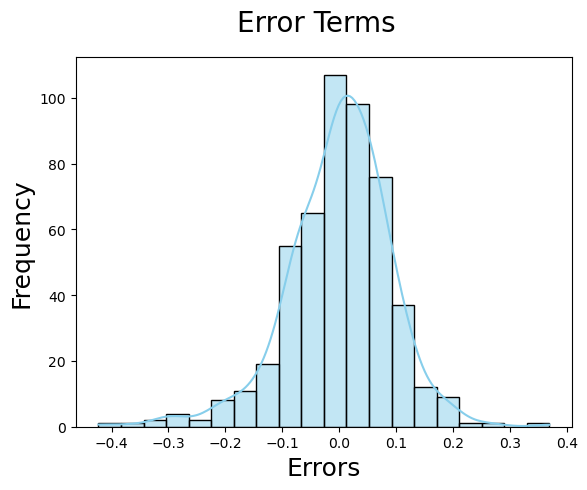

In [78]:
# Calculate the error terms
errors = y_train - y_train_pred

# Plot the histogram of the error terms with color
fig = plt.figure()
sns.histplot(errors, bins=20, kde=True, color='skyblue') 
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

##### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Multicollinearity

In [81]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
9,weathersit_Misty,1.51
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
8,weathersit_Light,1.08
1,holiday,1.04


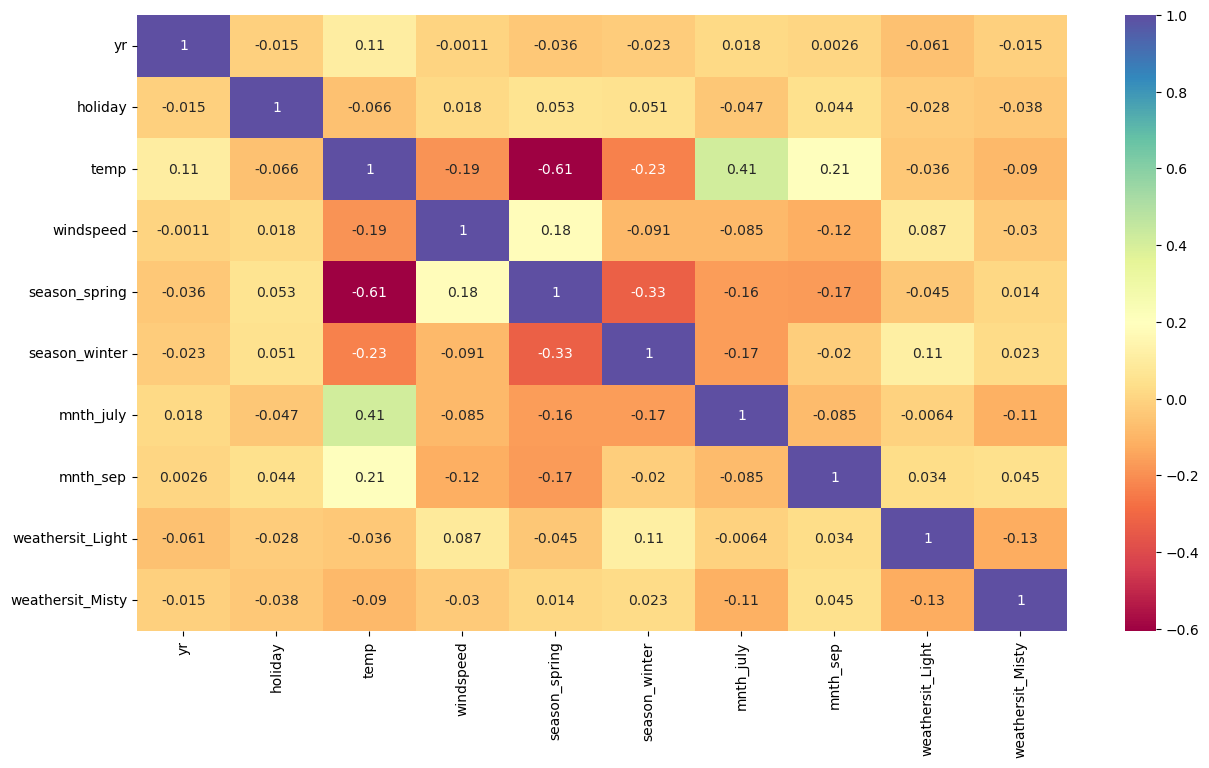

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Spectral")
plt.show()

##### All VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linear relationship validation

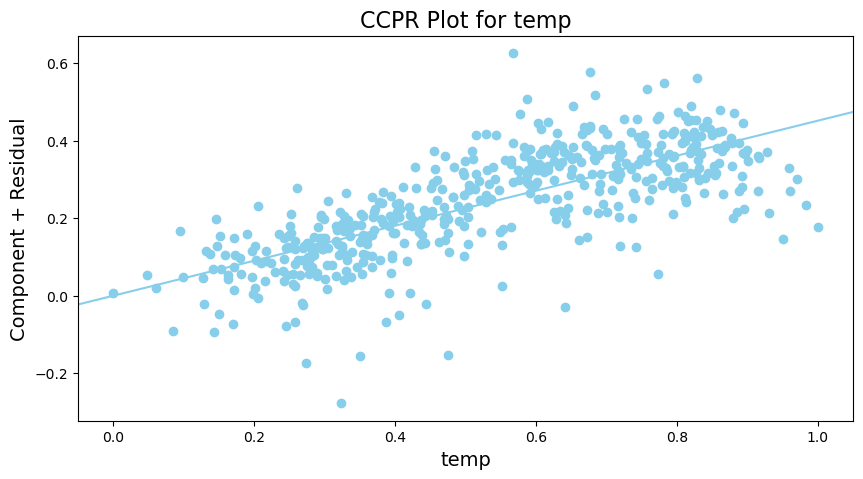

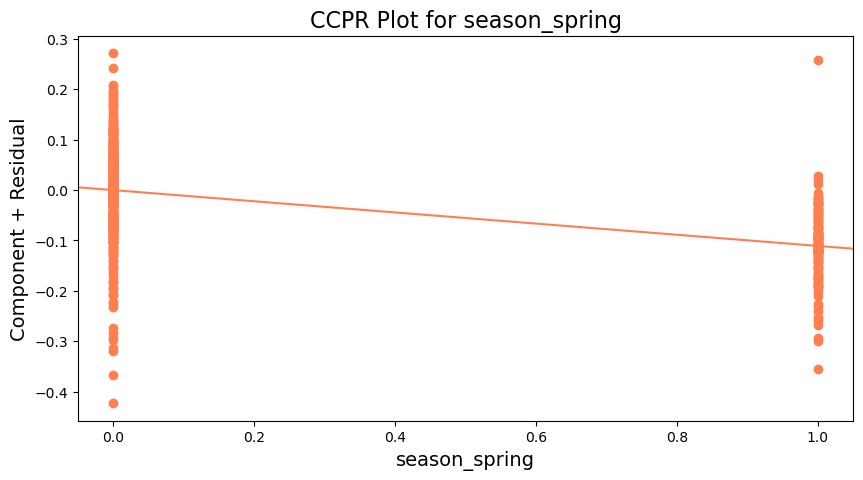

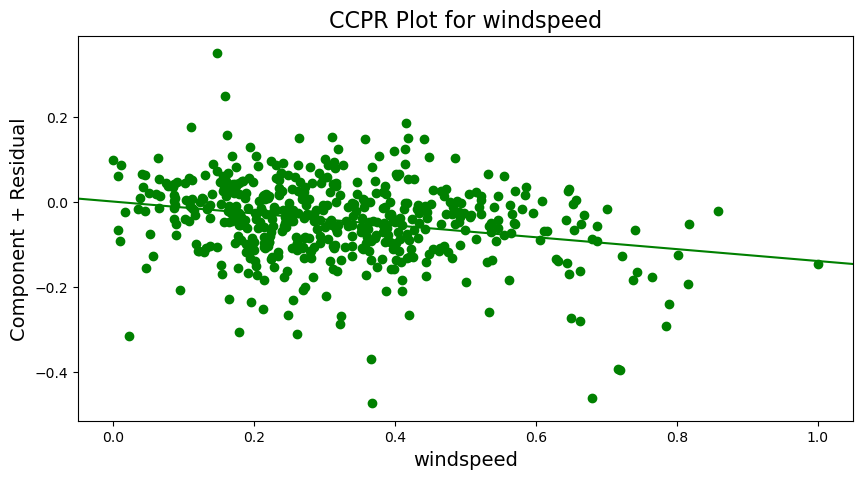

In [85]:
# Define a function to plot CCPR with custom color
def plot_ccpr_custom(model, var, color='blue'):
    fig, ax = plt.subplots(figsize=(10, 5))
    sm.graphics.plot_ccpr(model, var, ax=ax)
    for line in ax.get_lines():
        line.set_color(color)
    ax.set_title(f'CCPR Plot for {var}', fontsize=16)
    ax.set_xlabel(f'{var}', fontsize=14)
    ax.set_ylabel('Component + Residual', fontsize=14)
    plt.show()

# Linear relationship validation using CCPR plot
plot_ccpr_custom(lr_6, 'temp', color='skyblue')
plot_ccpr_custom(lr_6, 'season_spring', color='coral')
plot_ccpr_custom(lr_6, 'windspeed', color='green')

Linearity can be observed from above visualizations.

### Homoscedasticity

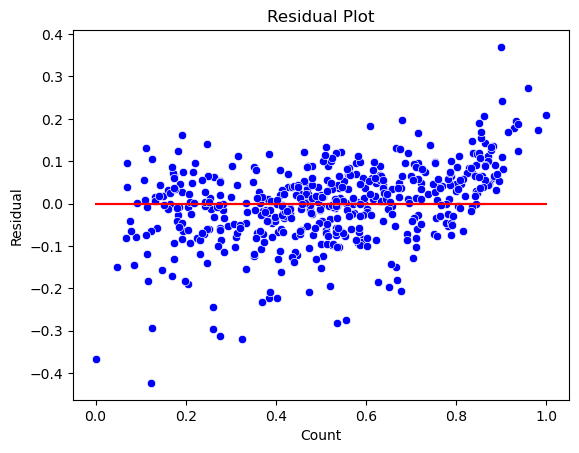

In [88]:
# Calculate predictions and residuals
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred

# Plot the scatter plot with a specified color
sns.scatterplot(x=y_train, y=residual, color='blue')
plt.plot(y_train, (y_train - y_train), '-r')  # Line at zero residuals
plt.xlabel('Count')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

No visible pattern observed from above plot for residuals.

### Independence of residuals
Durbin-Watson value of final model lr_6 is 2.002, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [93]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [97]:
y_pred = lr_6.predict(X_test_lm_6)

## Model Evaluation
#### R-Squared value for train predictions

In [99]:
r2_score(y_train,y_train_pred)

0.8328664237258241

#### R-Squared value for test predictions

In [101]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.807

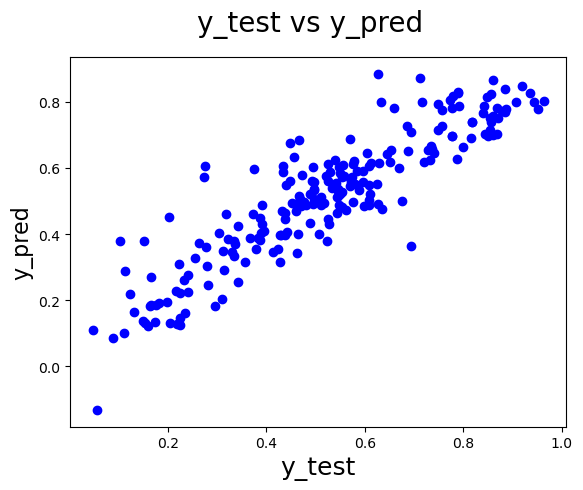

In [102]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [103]:
round(lr_6.params,4)

const               0.2519
yr                  0.2341
holiday            -0.0986
temp                0.4515
windspeed          -0.1398
season_spring      -0.1108
season_winter       0.0473
mnth_july          -0.0727
mnth_sep            0.0577
weathersit_Light   -0.2864
weathersit_Misty   -0.0811
dtype: float64

#### Equation
We can see that the equation of our best fitted line is:

cnt = 0.2519 + 0.2341 * yr − 0.0986 * holiday + 0.4515 * temp − 0.1398 * windspeed - 0.1108 * season_spring + 0.0473 * season_winter − 0.0727 * mnth_july + 0.0577 * mnth_sep − 0.2864 * weathersit_Light − 0.0811 * weathersit_Misty

In [105]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7977


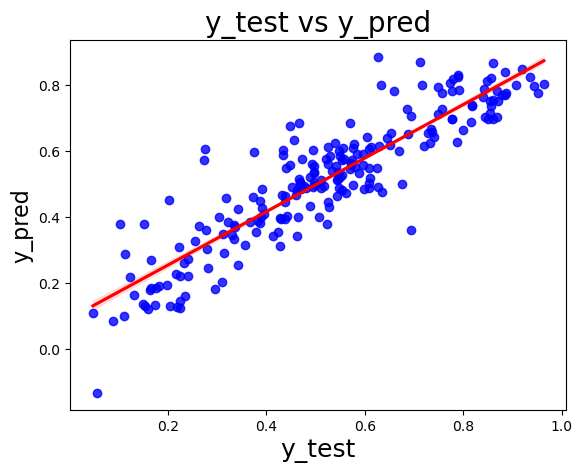

In [106]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparison between Train and Test dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.807
- Train dataset Adjusted R^2 : 0.830    
- Test dataset Adjusted R^2  : 0.7977

Demand of bikes depend on Year, Holiday, Temp, Windspeed, Season (Spring, Winter), Months (July, September), Weathersit (Light Snow, Mist + Cloudy).